In [28]:
import pandas as pd

In [29]:
from sklearn.datasets import fetch_california_housing

In [30]:
fetch_california_housing().keys()
import pandas as pd
housing=fetch_california_housing()

In [31]:
df=pd.DataFrame(data=housing['data'],columns=housing['feature_names'])

In [32]:
y=housing['target']

In [33]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_trian,y_test=train_test_split(
    df,y,test_size=0.2,random_state=42
)

In [36]:
x_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [37]:
x_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93


In [38]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [39]:
y_trian

array([1.03 , 3.821, 1.726, ..., 2.221, 2.835, 3.25 ])

In [40]:
#standerdizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [41]:
x_train=scaler.fit_transform(x_train)

In [42]:
x_test=scaler.transform(x_test)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
#appliting cross validation for the train data
from sklearn.model_selection import cross_val_score

In [54]:
regression=LinearRegression()
regression.fit(x_train,y_trian)

LinearRegression()

In [49]:
mse=cross_val_score(regression,x_train, y_trian,scoring='neg_mean_squared_error',cv=5)

In [50]:
import numpy as np
np.mean(mse)

-0.519265201143368

In [55]:
reg_pred=regression.predict(x_test)

In [56]:
reg_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [57]:
import seaborn as sns

In [60]:
sns.displot(reg_pred,y_test)

TypeError: displot() takes from 0 to 1 positional arguments but 2 were given

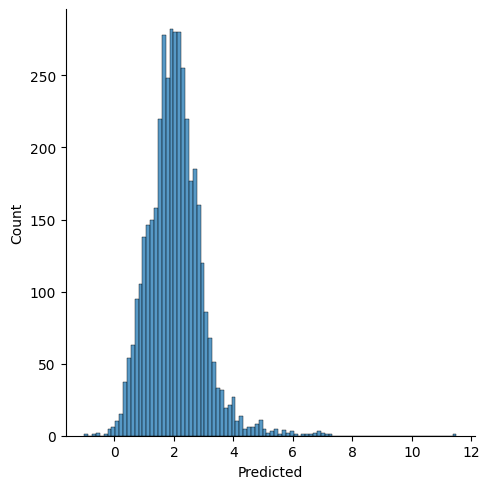

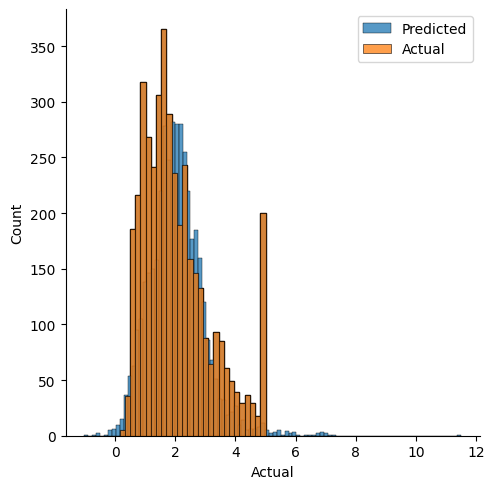

In [62]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for visualization
df_viz = pd.DataFrame({'Predicted': reg_pred, 'Actual': y_test})

# Use displot with 'x' parameter
sns.displot(df_viz, x='Predicted')  # Distribution of predicted values
sns.displot(df_viz, x='Actual')    # Distribution of actual values

# Or use histplot for a simpler histogram
sns.histplot(reg_pred, label='Predicted')
sns.histplot(y_test, label='Actual')
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import r2_score

In [65]:
score=r2_score(y_test,reg_pred)

In [66]:
score

0.575787706032451